# Lazy Eval JSON file read  

In [1]:
import numpy as np

In [2]:
from DocuTrace.Analysis import FileRead as fr
import os
%load_ext autoreload
%autoreload 2

json = fr.stream_read_json(os.path.abspath('sample_data/issuu_cw2.json'))

print(next(json))
print(next(json))


{'ts': 1393631983, 'visitor_uuid': '04daa9ed9dde73d3', 'visitor_source': 'external', 'visitor_device': 'browser', 'visitor_useragent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.117 Safari/537.36', 'visitor_ip': '6a3273d508a9de04', 'visitor_country': 'ES', 'visitor_referrer': '64f729926497515c', 'env_type': 'reader', 'env_doc_id': '140224195414-e5a9acedd5eb6631bb6b39422fba6798', 'event_type': 'impression', 'subject_type': 'doc', 'subject_doc_id': '140224195414-e5a9acedd5eb6631bb6b39422fba6798', 'subject_page': 0, 'cause_type': 'impression'}
{'ts': 1393631983, 'visitor_uuid': '04daa9ed9dde73d3', 'visitor_source': 'external', 'visitor_device': 'browser', 'visitor_useragent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.117 Safari/537.36', 'visitor_ip': '6a3273d508a9de04', 'visitor_country': 'ES', 'visitor_referrer': '64f729926497515c', 'env_type': 'reader', 'env_doc_id': '140224195414-e5a9ac

In [3]:
json = fr.stream_read_json(os.path.abspath('sample_data/issuu_sample.json'))

j = next(json)
type(j)


dict

In [4]:
print(j.keys())
j.get('visitor_country', None)

dict_keys(['ts', 'visitor_uuid', 'visitor_username', 'visitor_source', 'visitor_device', 'visitor_useragent', 'visitor_ip', 'visitor_country', 'visitor_referrer', 'env_type', 'env_doc_id', 'env_adid', 'event_type', 'subject_type', 'subject_doc_id', 'subject_page', 'cause_type'])


'MX'

In [1]:
from DocuTrace.Analysis.DataCollector import DataCollector
from DocuTrace.Analysis.ComputeData import ComputeData
from DocuTrace.Analysis.Plots import Graphs
from DocuTrace.Utils.Logging import logger, debug, logging
%load_ext autoreload
%autoreload 2
test = DataCollector()
test.set_read_path('sample_data/sample_100k_lines.json')
import time
start_time = time.time()
#@debug
test.gather_data(concurrent=True, max_workers=None, chunk_size=5000000)
duration = time.time() - start_time
# sample_3m_lines.json
#sample_400k_lines.json
# issuu_cw2.json

[ INFO ] Multiprocessing has been enabled in FileRead.parse_file.


In [2]:
duration

2.4020276069641113

In [3]:
cd = ComputeData(test)

In [4]:
gr = Graphs(cd, 'also_likes')
img = gr.also_likes_graph('140224093301-60151c849f742e45bfb63d18ab9ded78', n=8)
gr.save_view_graph(img)


[ DEBUG ] Graph file format: png
[ INFO ] Graph saved at: also_likes.png


'also_likes.png'

In [5]:
cd.construct_document_counts_figure('140224093301-60151c849f742e45bfb63d18ab9ded78')

([{'Europe': 109, 'North America': 1}, {'GB': 108, 'US': 1, 'ES': 1}],
 ['Document views from each continent', 'Document views from each country'],
 ['', ''],
 ['Continent', 'Country'])

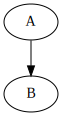

In [22]:
gr.basic_example()

In [10]:

most_related_docs = []
key = None
for doc in cd.document_readers.keys():
    related_docs = cd.also_likes(doc)
    if len(related_docs) > len(most_related_docs):
        key = doc
        most_related_docs = related_docs

most_related_docs, key

46768f',
  '130824011238-2744350ede2977a250a82caa90b38d68',
  '130824050542-df50d06c3821d2ee2bd693a20cd66f3e',
  '130826223048-cde30a95fa4f522c4528c769b7fbc36e',
  '130827152546-7ea9545bdffc8b3dcb80bdb099ace0b8',
  '130828181304-24779580c41fc6c8abb74934c34d5caa',
  '130829130215-f3edf0594227dbc917d11ac84b56c4d4',
  '130904010104-8b2f0a2be556ace97925af904075e08a',
  '130907182609-c7f1ce07868066dc0ce02cfeb6490ee9',
  '130909140422-91da7812a977cccc28a79114637cda56',
  '130909201407-e5cfbd14411e83d1dd4fe7633b136382',
  '130912011909-978c3ce4875ae54af214da0b113acd6f',
  '130914130739-d2eb66518646a0fceca6b3df0b163f69',
  '130915022812-0cda0b74e3b2d58bcadfd7f1b5064d27',
  '130921175740-398e4379e26fb68fe1df1ade45813c74',
  '130924172352-0c0f7c4c1d8c9198a97d159b3e05fbf7',
  '130928211752-3ddc2ffdf79b9dbf64f83858146213c0',
  '130929050709-8e335697be92322c38c6047b3f719d02',
  '130930190658-196126c1da08e27ab138a3bc028f4f51',
  '131001144921-aa41def376250ee4a3fb1c9a5534b853',
  '131001185825-354b0f

In [10]:
from graphviz import Digraph

dot = Digraph(name='Also likes', comment='Example')

with dot.subgraph() as context:
    context.attr('node', shape='plaintext', fontsize='16')
    context.edge('Readers', 'Documents')

with dot.subgraph() as top:
    top.attr('node', shape='box', rankdir='same', rank='same')
    top.node('A', '0', color='green', style='filled')
    top.node('B', '1')

with dot.subgraph() as bot:
    bot.attr('node', shape='circle', rankdir='same', rank='same')
    bot.node('C', '2')
    bot.node('D', '3', color='green', style='filled')

dot.edge('A', 'D')
dot.edge('A', 'C')
dot.edge('B', 'D')
print(dot.source)

// Example
digraph "Also likes" {
	{
		node [fontsize=16 shape=plaintext]
		Readers -> Documents
	}
	{
		node [rank=same rankdir=same shape=box]
		A [label=0 color=green style=filled]
		B [label=1]
	}
	{
		node [rank=same rankdir=same shape=circle]
		C [label=2]
		D [label=3 color=green style=filled]
	}
	A -> D
	A -> C
	B -> D
}


In [11]:
import numpy as np


In [12]:
u = np.array(['a','b', 'c'])
if 'b' in u:
    print(True)


True


In [13]:
from itertools import islice

reader = fr.stream_file_chunks('sample_data/issuu_sample.json', chunk_size=1)

In [14]:
next(reader)

['{   "ts": 1393631989,    "visitor_uuid": "745409913574d4c6",    "visitor_username": null,    "visitor_source": "external",    "visitor_device": "browser",    "visitor_useragent": "Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_6 like Mac OS X) AppleWebKit/537.51.1 (KHTML, like Gecko) Mobile/11B651 [FBAN/FBIOS;FBAV/7.0.0.17.1;FBBV/1325030;FBDV/iPhone4,1;FBMD/iPhone;FBSN/iPhone OS;FBSV/7.0.6;FBSS/2; FBCR/Telcel;FBID/phone;FBLC/es_ES;FBOP/5]",    "visitor_ip": "0e1c9cd3d6c22c65",    "visitor_country": "MX",    "visitor_referrer": "ab11264107143c5f",    "env_type": "reader",    "env_doc_id": "140228202800-6ef39a241f35301a9a42cd0ed21e5fb0",    "env_adid": null,    "event_type": "impression",    "subject_type": "doc",    "subject_doc_id": "140228202800-6ef39a241f35301a9a42cd0ed21e5fb0",    "subject_page": 23,    "cause_type": "page" }\n']

In [15]:
next(reader)

['{   "ts": 1393631990,    "visitor_uuid": "9a83c97f415601a6",    "visitor_username": null,    "visitor_source": "external",    "visitor_device": "browser",    "visitor_useragent": "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.63 Safari/537.36",    "visitor_ip": "03a2602450304bd4",    "visitor_country": "AR",    "visitor_referrer": "0aefac0a2bd221ab",    "env_type": "reader",    "env_doc_id": "131203154832-9b8594b7ec211f7e1a0782fd9883a42c",    "env_adid": null,    "event_type": "read",    "subject_type": "doc",    "subject_doc_id": "131203154832-9b8594b7ec211f7e1a0782fd9883a42c",    "subject_page": 0,    "cause": null }\n']

In [2]:
from collections import OrderedDict

o = OrderedDict([('a', 2), ('b', 4), ('c', 9)])
o['a']

2